In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
from datetime import datetime
import matplotlib.pyplot as  plt
import numpy as np

In [2]:
plt.style.use('ggplot')

### 1. Scraping and Pre Preocessing

In [132]:
URL = "https://www.worldfootball.net/player_summary/"
df = pd.read_csv('english-players-pl.csv', encoding='utf-16')
df.head()

,Player,Team,born,Height,Position
0,Ethan Nwaneri,Arsenal FC,21/03/2007,165 cm,MF
1,Ishé Samuels-Smith,Everton FC,05/06/2006,190 cm,DF
2,Zach Abbott,Nottingham Forest,13/05/2006,???,DF
3,Lewis Miley,Newcastle United,01/05/2006,???,MF
4,Archie Gray,Leeds United,12/03/2006,183 cm,MF


In [72]:
translationTable = str.maketrans("éàèùâêîôûç", "eaeuaeiouc")
def convert_name_to_slug(name):
    name = str(name).strip().lower()
    name = name.replace(' ','-')
    name = name.translate(translationTable)
    return name

In [126]:
players = df['Player']
for index, player in enumerate(players):
    url = URL + convert_name_to_slug(player)
    resp = requests.get(url)
    soup = BeautifulSoup(resp.text, 'html5lib')
    nationality = soup.find('span', itemprop= 'nationality')
    if nationality is not None:
        country = nationality.text or None
        df.loc[index, 'Nationality'] = country

    if index+1 % 5 == 0:
        time.sleep(3)

In [129]:
df.head(3)

,Unnamed: 0,Player,Team,born,Height,Position,Nationality
0,0,Ethan Nwaneri,Arsenal FC,21/03/2007,165 cm,MF,England
1,1,Ishé Samuels-Smith,Everton FC,05/06/2006,190 cm,DF,England
2,2,Zach Abbott,Nottingham Forest,13/05/2006,???,DF,England


In [ ]:
df.to_csv('english-players-pl-res.csv')

In [5]:
# I moved the dataset inside the dataset folder
df = pd.read_csv('dataset/relative-age-effect/english-players-pl-res.csv')
df['born'] = pd.to_datetime(df['born'], format='%d/%m/%Y')
df['Month'] = df['born'].dt.strftime('%B')
df.head(2)

,Unnamed: 0.1,Unnamed: 0,Player,Team,born,Height,Position,Nationality,Month
0,0,0,Ethan Nwaneri,Arsenal FC,2007-03-21,165 cm,MF,England,March
1,1,1,Ishé Samuels-Smith,Everton FC,2006-06-05,190 cm,DF,England,June


In [7]:
df = df[df['Nationality']== 'England']
len(df)

243

### 2. Analysing

A. All the Premier League Players of English Nationality.

In [8]:
month_counts = df['Month'].value_counts()
month_counts

October      29
September    27
January      26
March        25
February     24
November     23
May          19
April        18
December     17
July         15
June         11
August        9
Name: Month, dtype: int64

In [9]:
groupA = month_counts['September'] + month_counts['October'] + month_counts['November']
groupB = month_counts['December'] + month_counts['January'] + month_counts['February'] 
groupC = month_counts['March'] + month_counts['April'] + month_counts['May'] 
groupD = month_counts['June'] +  month_counts['July'] + month_counts['August'] 

groupA, groupB, groupC, groupD

(79, 67, 62, 35)

In [10]:
total_pl_players_england = sum(month_counts)
total_pl_players_england

243

2. Top 80 Most Capped English Players.

In [12]:
df2 = pd.read_csv('dataset/relative-age-effect/england-most-capped.csv', encoding='utf-16')
df2.head()

,Name,Born,Died,Period,Caps,Goals,First Match,Last Match
0,Peter Shilton,18 Sep 1949,NaN,1970 - 1990,125,NaN,25 Nov 1970,07 Jul 1990
1,Wayne Rooney,24 Oct 1985,NaN,2003 - 2018,120,53.0,12 Feb 2003,15 Nov 2018
2,David Beckham,02 May 1975,NaN,1996 - 2009,115,17.0,01 Sep 1996,14 Oct 2009
3,Steven Gerrard,30 May 1980,NaN,2000 - 2014,114,21.0,31 May 2000,24 Jun 2014
4,Bobby Moore,12 Apr 1941,24 Feb 1993,1962 - 1973,108,2.0,20 May 1962,14 Nov 1973


In [13]:
df2['Month'] = df2['Born'].apply(lambda x : x.split(' ')[1])
df2.head(2)

,Name,Born,Died,Period,Caps,Goals,First Match,Last Match,Month
0,Peter Shilton,18 Sep 1949,NaN,1970 - 1990,125,NaN,25 Nov 1970,07 Jul 1990,Sep
1,Wayne Rooney,24 Oct 1985,NaN,2003 - 2018,120,53.0,12 Feb 2003,15 Nov 2018,Oct


In [14]:
born_month_counts = df2['Month'].value_counts()

In [15]:
born_month_counts

Oct    10
Dec    10
Nov     9
Feb     8
Sep     7
Apr     7
Jan     7
May     6
Aug     6
Mar     4
Jun     3
Jul     3
Name: Month, dtype: int64

In [16]:
group1 = born_month_counts['Sep'] + born_month_counts['Oct'] + born_month_counts['Nov']
group2 = born_month_counts['Dec'] + born_month_counts['Jan'] + born_month_counts['Feb']
group3 = born_month_counts['Mar'] + born_month_counts['Apr'] + born_month_counts['May']
group4 = born_month_counts['Jun'] + born_month_counts['Jul'] + born_month_counts['Aug']

group1,group2,group3,group4

(26, 25, 17, 12)

In [17]:
total_players = sum(born_month_counts)
total_players

80

In [25]:
labels = ['First Quarter', 'Second Quarter', 'Third Quarter', 'Fourth Quarter']

# for international caps
international_caps = [group1,group2,group3,group4]
english_players_count = [groupA, groupB, groupC, groupD]

### 3. Visualisation

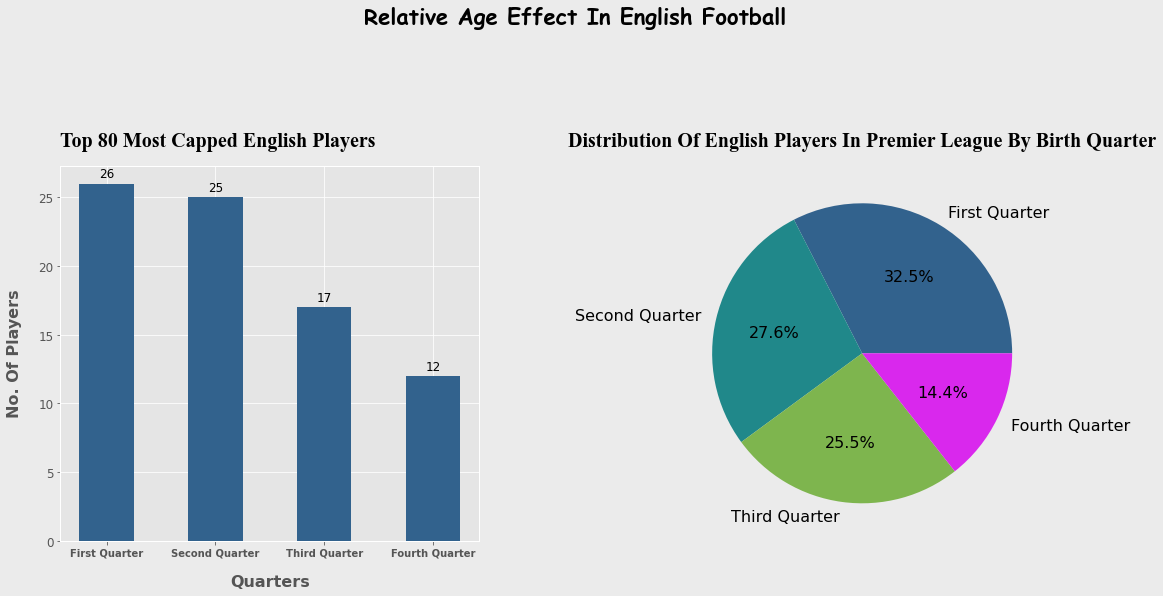

In [33]:
fig, ((ax1, ax2)) = plt.subplots(1,2,figsize=(18,10),facecolor=(.92, .92, .92))
fontdict = {'fontsize':16, 'fontweight':'bold'}
title_fontdict = {'fontsize':20, 'fontweight':'bold','fontname':'Times New Roman'}

# for ax1
x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars
rects1 = ax1.bar(x, international_caps,width=width, label='Wins',color = "#32628d")
# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_xlabel('Quarters',labelpad=16, fontdict=fontdict )
ax1.set_ylabel('No. Of Players',labelpad=16, fontdict=fontdict)
ax1.set_title("Top 80 Most Capped English Players",fontdict=title_fontdict, pad=20,loc='left')
ax1.set_xticks(x, labels,weight = 'bold')
ax1.tick_params(axis='y', which='major', labelsize=12)
ax1.bar_label(rects1, padding=3, fontsize=12)

# for ax2
color = ['#32628d','#20888a','#7eb54e','#d928ed']
bars = ax2.pie(english_players_count,labels=labels, colors = color, autopct='%1.1f%%', textprops={'fontsize': 16})
ax2.set_title("Distribution Of English Players In Premier League By Birth Quarter",fontdict=title_fontdict, pad=20)

fig.suptitle('Relative Age Effect In English Football',fontweight = "bold",fontsize=22, fontname="Cursive",y=0.92)
fig.tight_layout(pad=8.0)
plt.show()

### # Luck In Football

In [18]:
df3 = pd.read_csv('dataset/expected-goals-and-points.csv', encoding='utf-16')
df3.head(2)

,№,Team,M,W,D,L,G,GA,PTS,xG,xG - G,xGA,xPTS,xPTS - PTS
0,1,Arsenal,30,23,4,3,72,29,73,62.45,-9.55,33.86+4.86,60.21,-12.79
1,2,Man City,29,21,4,4,75,27,67,-67.18,-7.82,24.92-2.08,65.96,-1.04


In [19]:
df3 = df3[:11]
df3.tail(2)

,№,Team,M,W,D,L,G,GA,PTS,xG,xG - G,xGA,xPTS,xPTS - PTS
9,10,Fulham,29,11,6,12,39,40,39,36.51,-2.49,55.81+15.81,29.71,-9.29
10,11,Chelsea,30,10,9,11,29,31,39,41.81,12.81,37.19+6.19,44.42,5.42


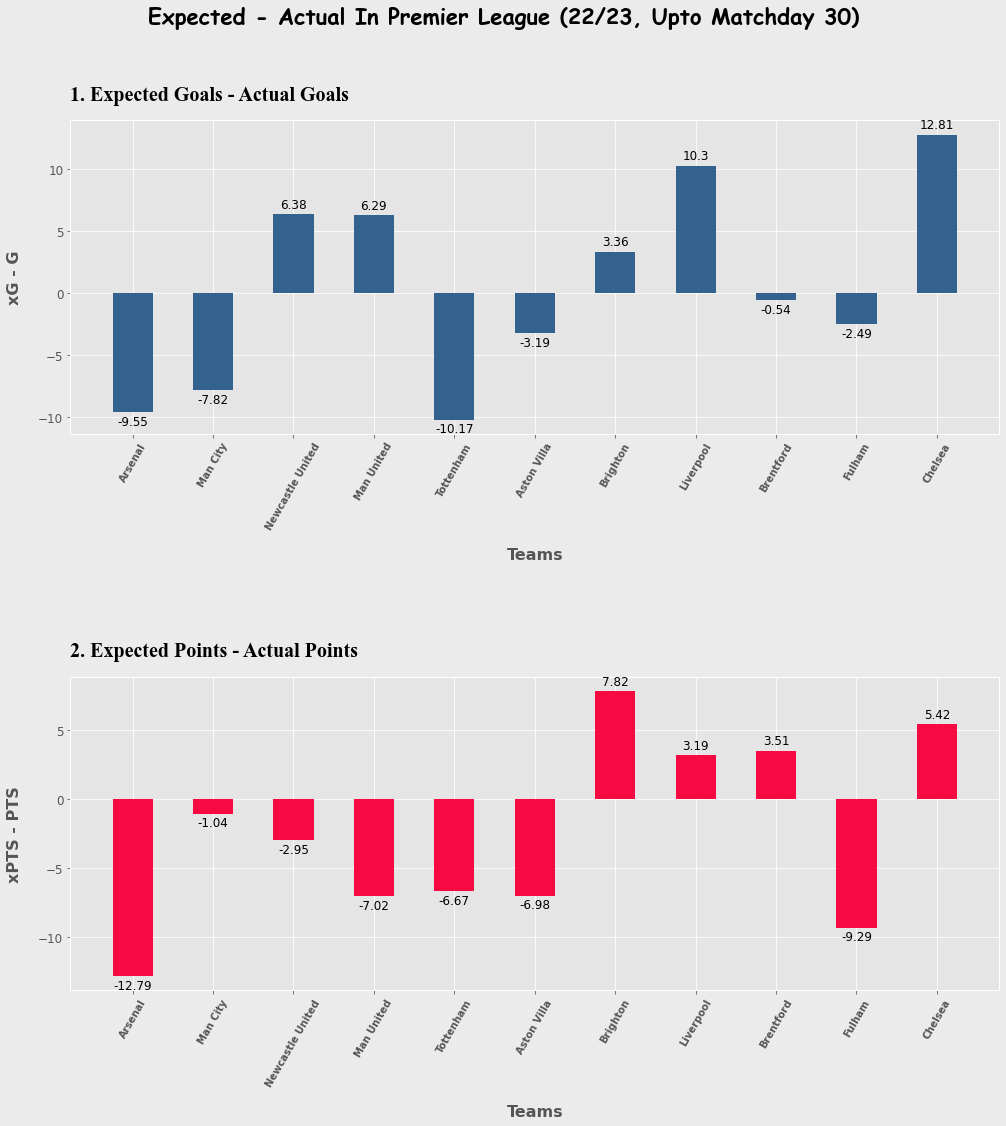

In [22]:
fig, ((ax1, ax2)) = plt.subplots(2,1,figsize=(16,18),facecolor=(.92, .92, .92))
fontdict = {'fontsize':16, 'fontweight':'bold'}
title_fontdict = {'fontsize':20, 'fontweight':'bold','fontname':'Times New Roman'}

# for ax1
x = np.arange(len(df3['Team']))  # the label locations
width = 0.5  # the width of the bars
rects1 = ax1.bar(x, df3['xG - G'],width=width, label='Wins',color = "#32628d")
# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_xlabel('Teams',labelpad=16, fontdict=fontdict )
ax1.set_ylabel('xG - G',labelpad=16, fontdict=fontdict)
ax1.set_title("1. Expected Goals - Actual Goals",fontdict=title_fontdict, pad=20,loc='left')
ax1.set_xticks(x, df3['Team'],weight = 'bold',rotation=60)
ax1.tick_params(axis='y', which='major', labelsize=12)
ax1.bar_label(rects1, padding=3, fontsize=12)

# for ax2
x = np.arange(len(df3['Team']))  # the label locations
width = 0.5  # the width of the bars
rects1 = ax2.bar(x, df3['xPTS - PTS'],width=width, label='Wins',color = "#f70a41")
# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_xlabel('Teams',labelpad=16, fontdict=fontdict )
ax2.set_ylabel('xPTS - PTS',labelpad=16, fontdict=fontdict)
ax2.set_title("2. Expected Points - Actual Points",fontdict=title_fontdict, pad=20,loc='left')
ax2.set_xticks(x, df3['Team'],weight = 'bold',rotation=60)
ax2.tick_params(axis='y', which='major', labelsize=12)
ax2.bar_label(rects1, padding=3, fontsize=12)


fig.suptitle('Expected - Actual In Premier League (22/23, Upto Matchday 30)',fontweight = "bold",fontsize=22, fontname="Cursive",y=0.92)
fig.tight_layout(pad=8.0)
plt.show()